<h1>Импорт библиотек

# Подготовка doctest
<p>Буду использовать для тестирования</p>

In [2]:
import doctest
from IPython.core.magic import register_cell_magic

# Магия ячейки для запуска doctest
@register_cell_magic
def doctest_magic(line, cell):
    # Инициализируем код из ячейки
    exec(cell, globals())

    # Ищем все локальные объекты
    local_vars = {}
    exec(cell, globals(), local_vars)

    # Проходим по всем объектам в локальных переменных и ищем docstring'и для тестирования
    for name, obj in local_vars.items():
        if callable(obj):  # Проверяем, объект является функцией или классом
            print(f"Running doctests for {name}...\n")
            try:
                doctest.run_docstring_examples(obj, globals(), name=name, verbose=True)
            except Exception as e:
                print(f"Error running doctests for {name}: {e}")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [4]:
%%doctest_magic
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    >>> sum_prod([np.array([[1, 0, 0], [0, 1, 0], [0, 0, 2]]), np.array([[2, 0, 0], [0, 7, 0], [0, 0, 4]])], [np.array([[6], [3], [1]]), np.array([[2], [1], [2]])])
    [[10]
     [10]
     [10]]
    '''
    cnt = len(V)
    result = np.NaN
    for i in range(cnt):
      matrix = np.dot(X[i], V[i])
      if result is np.NaN:
        result = matrix
      else:
        result = np.add(result, matrix)
    print(result)


Running doctests for sum_prod...

Finding tests in sum_prod
Trying:
    sum_prod([np.array([[1, 0, 0], [0, 1, 0], [0, 0, 2]]), np.array([[2, 0, 0], [0, 7, 0], [0, 0, 4]])], [np.array([[6], [3], [1]]), np.array([[2], [1], [2]])])
Expecting:
    [[10]
     [10]
     [10]]
**********************************************************************
File "__main__", line 6, in sum_prod
Failed example:
    sum_prod([np.array([[1, 0, 0], [0, 1, 0], [0, 0, 2]]), np.array([[2, 0, 0], [0, 7, 0], [0, 0, 4]])], [np.array([[6], [3], [1]]), np.array([[2], [1], [2]])])
Exception raised:
    Traceback (most recent call last):
      File "c:\Users\sulay\AppData\Local\Programs\Python\Python310\lib\doctest.py", line 1350, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest sum_prod[0]>", line 1, in <module>
        sum_prod([np.array([[1, 0, 0], [0, 1, 0], [0, 0, 2]]), np.array([[2, 0, 0], [0, 7, 0], [0, 0, 4]])], [np.array([[6], [3], [1]]), np.array([[2], [1], [2]])])
     

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [5]:
%%doctest_magic
def binarize(M, threshold=0.5):
  """
  >>> binarize(np.array([[1, 0, 0], [0, 1, 0], [0, 0, 2]]), threshold=0.5)
  [[1 0 0]
   [0 1 0]
   [0 0 1]]
  """
  result = M.copy()
  for i in range(len(M)):
    for j in range(len(M[0])):
      result[i][j] = 1 if M[i][j] > threshold else 0
  print(result)

Running doctests for binarize...

Finding tests in binarize
Trying:
    binarize(np.array([[1, 0, 0], [0, 1, 0], [0, 0, 2]]), threshold=0.5)
Expecting:
    [[1 0 0]
     [0 1 0]
     [0 0 1]]
ok


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [6]:
%%doctest_magic
def unique_rows(mat):
  """
  >>> unique_rows(np.array([[1, 0, 0], [0, 6, 0], [0, 7, 2]]))
  [0 1]
  [0 6]
  [0 2 7]
  """
  n = len(mat)
  for i in range(n):
    print(np.unique(mat[i]))


def unique_columns(mat):
  """
  >>> unique_columns(np.array([[1, 0, 0], [0, 6, 0], [0, 7, 2]]))
  [0 1]
  [0 6 7]
  [0 2]
  """
  rows_cnt = len(mat)
  columns_cnt = len(mat[0])
  for i in range(rows_cnt):
    print(np.unique([mat[j][i] for j in range(columns_cnt)]))
    # Your code goes here
    pass

Running doctests for unique_rows...

Finding tests in unique_rows
Trying:
    unique_rows(np.array([[1, 0, 0], [0, 6, 0], [0, 7, 2]]))
Expecting:
    [0 1]
    [0 6]
    [0 2 7]
ok
Running doctests for unique_columns...

Finding tests in unique_columns
Trying:
    unique_columns(np.array([[1, 0, 0], [0, 6, 0], [0, 7, 2]]))
Expecting:
    [0 1]
    [0 6 7]
    [0 2]
ok


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [7]:
# Your code goes here
def print_rows(mat, m):
  for i in range(m):
    _, ax = plt.subplots()
    mean = mat[i].mean()
    print(f'мат. ожидание - {mean}, срока номер {i + 1}')
    variance = mat[i].var()
    print(f'дисперсия - {variance}, срока номер {i + 1}')
    ax.hist(mat[i])
    ax.set_title(f'строка номер {i + 1}')

def print_columns(mat, m, n):
  for i in range(n):
    _, ax = plt.subplots()
    mat_columns = np.array([mat[j][i] for j in range(m)])
    mean = mat_columns.mean()
    print(f'мат. ожидание - {mean}, колонка номер {i + 1}')
    variance = mat_columns.var()
    print(f'дисперсия - {variance}, колонка номер {i + 1}')
    ax.hist(mat_columns)
    ax.set_title(f'колонка номер {i + 1}')

def normal_distribution_func(m, n):
  mat = np.random.normal(150, 10, (m, n))
  print_rows(mat, m)
  print_columns(mat, m, n)

мат. ожидание - 145.1450463099373, срока номер 1
дисперсия - 2.4846374314395243, срока номер 1
мат. ожидание - 160.42574010410328, срока номер 2
дисперсия - 31.94011435203247, срока номер 2
мат. ожидание - 150.74775055493984, колонка номер 1
дисперсия - 16.21214637162342, колонка номер 1
мат. ожидание - 154.82303585910074, колонка номер 2
дисперсия - 126.65843167222508, колонка номер 2


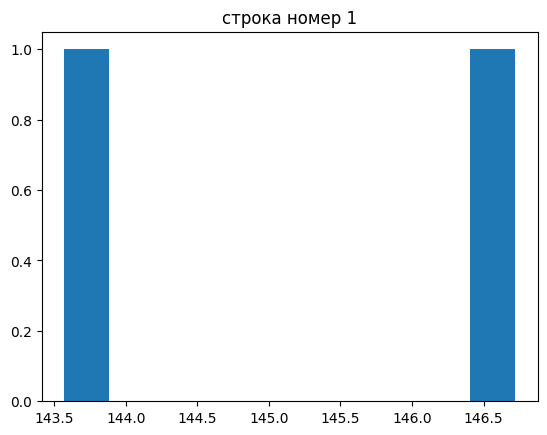

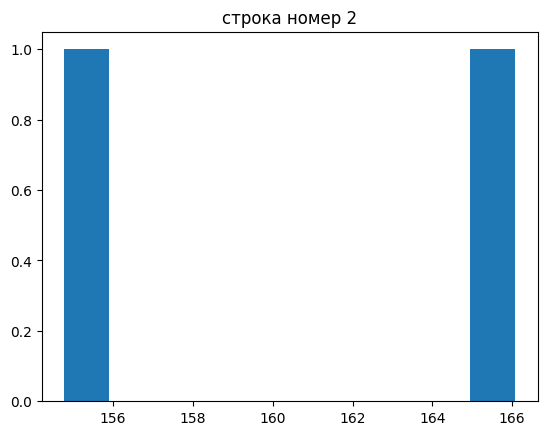

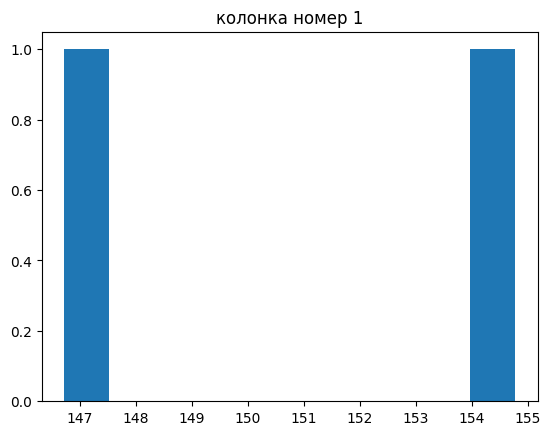

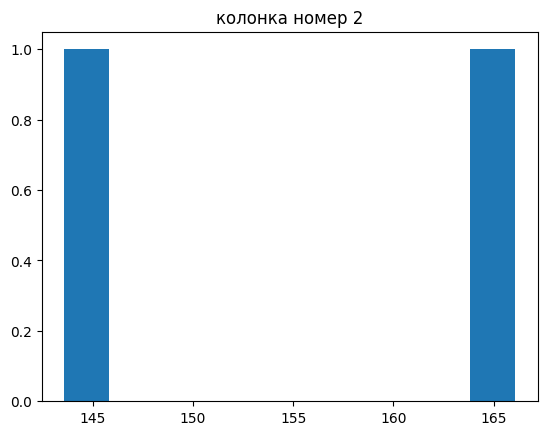

In [8]:
normal_distribution_func(2, 2)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [9]:
%%doctest_magic
def chess(m, n, a, b):
  """
  >>> chess(2, 2, 0, 1)
  [[0. 1.]
   [1. 0.]]
  """
  mat = np.eye(m, n)
  for i in range(m):
    for j in range(n):
      if (i + j) % 2 == 0:
        mat[i][j] = a
      else:
        mat[i][j] = b
  print(mat)

Running doctests for chess...

Finding tests in chess
Trying:
    chess(2, 2, 0, 1)
Expecting:
    [[0. 1.]
     [1. 0.]]
ok


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [10]:
from matplotlib.patches import Ellipse

In [11]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
  plt.figure(figsize=(m,n))
  rect1=plt.Rectangle(xy = 0, width=a / m, height=b / n, color=rectangle_color)
  fig = plt.gcf()
  ax = fig.gca()
  ax.add_patch(rect1)
  ax.set_facecolor(background_color)
  plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
  plt.figure(figsize=(m,n))
  ellipse = Ellipse((0.5, 0.5), width=a / m, height=b / n, color=ellipse_color)
  fig = plt.gcf()
  ax = fig.gca()
  ax.add_patch(ellipse)
  ax.set_facecolor(background_color)
  plt.show()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [12]:
# Your code goes here
def func7(time_series, p):
  mean = time_series.mean()
  print(f'мат. ожидание - {mean}')
  variance = time_series.var()
  print(f'дисперсия - {variance}')
  standard_deviation = time_series.std()
  print(f'стандартное отклонение - {standard_deviation}')


  #Можно использовать и словарь, через for i in time_series.keys()
  l = len(time_series)
  min = []
  max = []
  flag = time_series[0] - time_series[1] > 0
  for i in range(l - 1):
    if flag != time_series[i] - time_series[i + 1] > 0:
      if time_series[i] - time_series[i + 1] == 0:
        continue
      else:
        max.append(time_series[i]) if flag else min.append(time_series[i])
        flag = time_series[i] - time_series[i + 1] > 0
  print(f'лок макс {max}')
  print(f'лок мин {min}')


  print(f'Новый ряд - {[sum(time_series[i:i+p:1])/p for i in range(l-p)]}')

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [34]:
def one_hot_encoding(labels):
# Находим максимальное значение метки, чтобы определить размерность one-hot векторов
    num_classes = np.max(labels) + 1
# Создаем матрицу нулей с нужной формой
    one_hot_matrix = np.zeros((len(labels), num_classes), dtype=int)

# Заполняем матрицу единицами в нужных позициях
    for i, label in enumerate(labels):
        one_hot_matrix[i, label] = 1

    return one_hot_matrix

